# Load the libraries

In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read in the spreadsheet

In [28]:
# Importing the dataset
df = pd.read_excel(io='CU_V1.xlsx', sheet_name='Factors', parse_dates=True, index_col='Date')

# Sort Index - Excel automatically sorts in a descending manner 
df = df.sort_index()

In [29]:
df.shape

(85, 6)

# Data Preprocessing
The data here is pretty clean - so no need for the following activities

- Encoding categorical data
- Dealing with missing values
- Interpolation / extrapolation 
- Re-aligning dates



# Multi Linear Regression

In [30]:
# Create the independent variables and the dependent variables
num_cols = len(df.columns)
X = df.iloc[:, :-1].values  # All but the last colum
y = df.iloc[:, num_cols-1].values    # The Last column

## Split the data into Test data and Training data


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Fit  multiple linear regressor to the training set

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict the test set

In [33]:
y_pred = regressor.predict(X_test)

## Compare the predicted values with the actual values

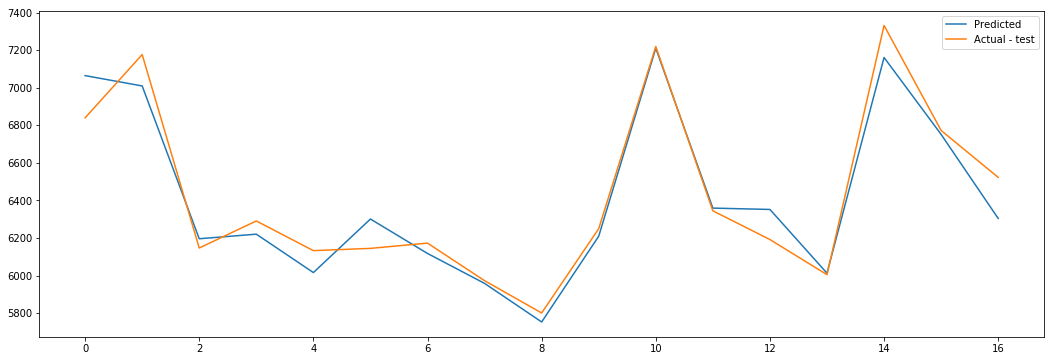

In [34]:
df_tmp = pd.DataFrame()
df_tmp['Predicted'] = y_pred
df_tmp['Actual - test'] = y_test
df_tmp.plot(figsize=(18,6))

# Use Backward Elimination to build the optimal model

- **Step 1:** Select a significance level to stay in the model (e.g. SL = 0.05)
- **Step 2:** Fit the model with all possible predictors
- **Step 3:** Consider the predictor with the highest P-value. If P > SL then go to Step 4, otherwise finish
- **Step 4:** Remove the predictor
- **Step 5:** Fit the model without this variable

## Add a column of 1's to the X matrix

This is required by the stats model libraries that we will be using shortly. 

Recall from above, the equation we are dealing with has the form

\begin{eqnarray*}
\large y = b_0 + b_1X_{CARB} + b_2X_{NLSCA} + b_3X_{SHASHRI} + b_4X_{CNH} + b_5X_{FXJPEMCS} + b_6X_{LMCADS03}
\end{eqnarray*}

** *Equation 1 -- Equation for Multiple Linear Regression* **<br><br>


Note there is a constant $\large b_0$ that is isolated, it is note associated with any $\large X_n$ <br>
We can associate an $\large X_0$ with this value by letting $\large X_0 = 1$

Now we have an identical equation

\begin{eqnarray*}
\large y = b_0X_0 + b_1X_{CARB} + b_2X_{NLSCA} + b_3X_{SHASHRI} + b_4X_{CNH} + b_5X_{FXJPEMCS} + b_6X_{LMCADS03}
\end{eqnarray*}

** *Equation 2 -- Equivalent Equation for Multiple Linear Regression ($X_0 = 1$)* **<br><br>


In [35]:
# Add a column of 1's 

rows = len(df)
X = np.append(arr = np.ones((rows,1)).astype(int), values = X, axis=1)

Look at the values of X1 ... x5 and pick the largest P>|t| value that is greater than our Significance Level threshold (0.05)  
If there is one then fit the model without this value.

** Note the threshhold can be greater or less **

In [36]:
# Quick inspection of what we are dealing with
pd.DataFrame(X).head()


,0,1,2,3,4,5
0,1.0,114.6285,293450.0,3290.021,6.3886,66.457
1,1.0,104.3983,294750.0,3268.136,6.4239,66.025
2,1.0,72.8558,283375.0,3185.360,6.4006,66.483
3,1.0,64.8465,311525.0,3242.107,6.4094,66.215
4,1.0,27.9389,317950.0,3220.878,6.4131,66.054


- Col [0] : The Columns of 1's - intercept, constant
- Col [1] : CARB
- Col [2] : NLSCA
- Col [3] : SHASHRI
- Col [4] : CNH
- Col [5] : FXJPEMCS

## Iteration 1

In [37]:
# Create a new matrix of features that will be our 'optimal' set of features
# This is the set of features that will will iteratively remove values from
# as eliminate insignificant features from our model
X_opt = X[:,[0,1,2,3,4,5]]

import statsmodels.formula.api as sm

regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     171.4
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           6.71e-41
Time:                        22:06:55   Log-Likelihood:                -527.11
No. Observations:                  85   AIC:                             1066.
Df Residuals:                      79   BIC:                             1081.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.525e+04   2181.323      6.992      0.000    1.09e+04    1.96e+04
x1            -0.4962      0.199     -2.489      0.015      -0.893      -0.099
x2            -0.0002      0.001     -0.253      0.801      -0.002       0.002
x3             0.7868      0.230      3.420      0.001       0.329       1.245
x4         -1692.1005    217.937     -7.764      0.000   -2125.894   -1258.307
x5             3.4497     11.523      0.299      0.765     -19.485      26.385
==============================================================================
Omnibus:                       10.136   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.383
Skew:                          -0.024   Prob(JB):                        0.184
Kurtosis:                       2.024   Cond. No.                     4.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ** Iteration 2 ** Repeat again and remove x2 (index position = 2)

Becuase the P value of x2 os the largest P-value greater that the threshold (0.05)

In [38]:
X_opt = X[:,[0,1,3,4,5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     216.8
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           4.40e-42
Time:                        22:06:55   Log-Likelihood:                -527.14
No. Observations:                  85   AIC:                             1064.
Df Residuals:                      80   BIC:                             1077.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.496e+04   1832.271      8.163      0.000    1.13e+04    1.86e+04
x1            -0.5080      0.193     -2.635      0.010      -0.892      -0.124
x2             0.7948      0.227      3.509      0.001       0.344       1.246
x3         -1658.2221    170.737     -9.712      0.000   -1997.999   -1318.445
x4             3.1329     11.387      0.275      0.784     -19.528      25.794
==============================================================================
Omnibus:                       10.865   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.493
Skew:                          -0.014   Prob(JB):                        0.174
Kurtosis:                       2.007   Cond. No.                     4.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ** Iteration 3 ** Repeat again and remove x4 (index position = 4)

In [39]:
X_opt = X[:,[0,1,3,4]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     292.3
Date:                Thu, 04 Oct 2018   Prob (F-statistic):           2.45e-43
Time:                        22:06:55   Log-Likelihood:                -527.18
No. Observations:                  85   AIC:                             1062.
Df Residuals:                      81   BIC:                             1072.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.514e+04   1694.631      8.936      0.000    1.18e+04    1.85e+04
x1            -0.5035      0.191     -2.636      0.010      -0.883      -0.123
x2             0.8188      0.208      3.938      0.000       0.405       1.232
x3         -1666.6848    166.982     -9.981      0.000   -1998.927   -1334.442
==============================================================================
Omnibus:                       10.832   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.490
Skew:                          -0.018   Prob(JB):                        0.175
Kurtosis:                       2.008   Cond. No.                     3.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

Suggests that **NLSCA** and **FXJPEMCS** have no significance on the price, but the other factors do.